In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## import data

mall= pd.read_csv('Mall_customers.csv')

In [3]:
### descriptive statisics abouth the data

mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
## is there any null data

mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
### first five rows of the data
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Number of Male to Femal Customers')

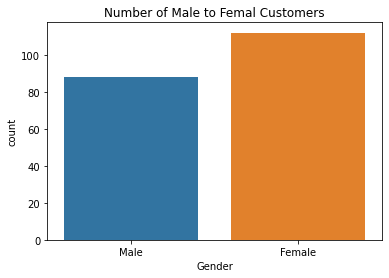

In [10]:
#### do a count plot for male vs female 

sns.countplot(x='Gender',data= mall)
plt.title('Number of Male to Femal Customers')

In [5]:
### a function that will define if the customer is young,adult or senior based on age
def age_category(x):
    if x <= 22:
        return  'Young'
    elif x<= 56:
        return  'Adult'
    else : 
        return 'Senior'

In [6]:
### applying map on the function
mall['age_category']= mall.Age.map(age_category)


In [7]:
###most of the data are adults
mall['age_category'].value_counts()

Adult     147
Senior     28
Young      25
Name: age_category, dtype: int64

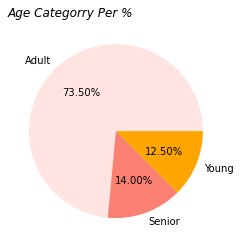

In [10]:
#Pie chart of age

y=np.array([147,28,25])
mylabels= ['Adult','Senior','Young']
colors= ['mistyrose','salmon','orange']
plt.pie(y,labels=mylabels,autopct='%1.2f%%',colors=colors)
plt.title('Age Category Percentage ',loc='left',fontstyle='italic')
plt.show()

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

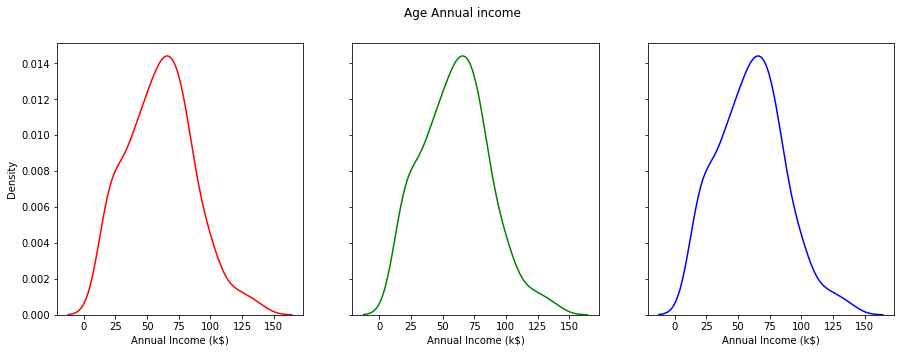

In [87]:
## annual income by age category

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Age Annual income')


sns.kdeplot(ax= axes[0],x= mall['Annual Income (k$)'],
            data=mall[mall['age_category']=='Young'],label='Young',color='red')

sns.kdeplot(ax= axes[1],x= mall['Annual Income (k$)'],
            data=mall[mall['age_category']=='Adult'],label='Adult',color='green')
sns.kdeplot(ax= axes[2],x= mall['Annual Income (k$)'],
            data=mall[mall['age_category']=='Senior'],label='Senior',color='blue')



<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

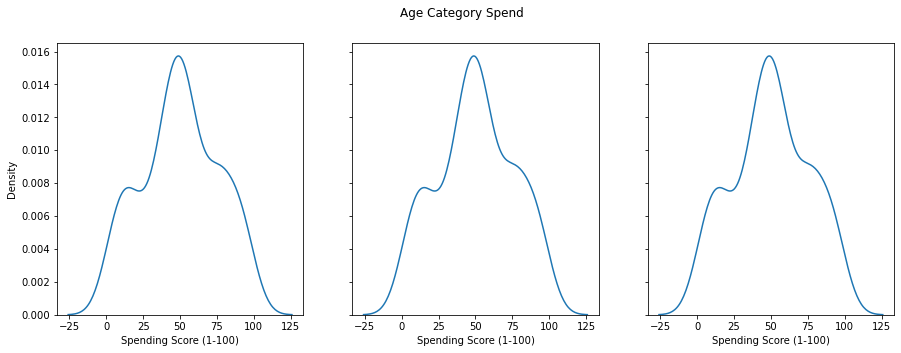

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Age Category Spend')


sns.kdeplot(ax= axes[0],x= mall['Spending Score (1-100)'],
            data=mall[mall['age_category']=='Young'],label='Young')
sns.kdeplot(ax= axes[1],x= mall['Spending Score (1-100)'],
            data=mall[mall['age_category']=='Adult'],label='Adult')
sns.kdeplot(ax= axes[2],x= mall['Spending Score (1-100)'],
            data=mall[mall['age_category']=='Senior'],label='Senior')



In [32]:
## creating bins of age
mall['Age-Band']= pd.qcut(mall['Age'],6,labels=None)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '(17.999, 24.0]'),
  Text(1, 0, '(24.0, 31.0]'),
  Text(2, 0, '(31.0, 36.0]'),
  Text(3, 0, '(36.0, 45.0]'),
  Text(4, 0, '(45.0, 53.833]'),
  Text(5, 0, '(53.833, 70.0]')])

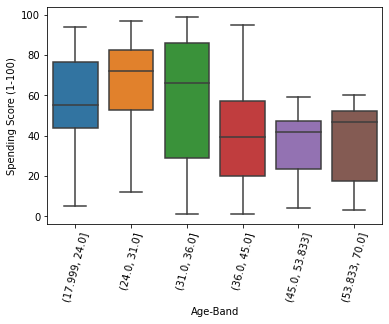

In [35]:
sns.boxplot(x= 'Age-Band',y='Spending Score (1-100)',data= mall)
plt.xticks(rotation=75)

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

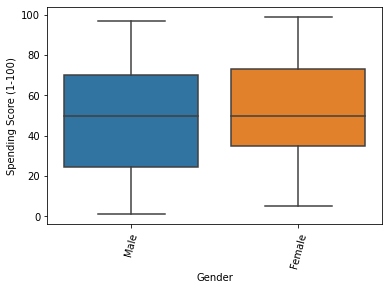

In [36]:
## boxplot of the spending score between male and female
sns.boxplot(x= 'Gender',y='Spending Score (1-100)',data= mall)
plt.xticks(rotation=75)

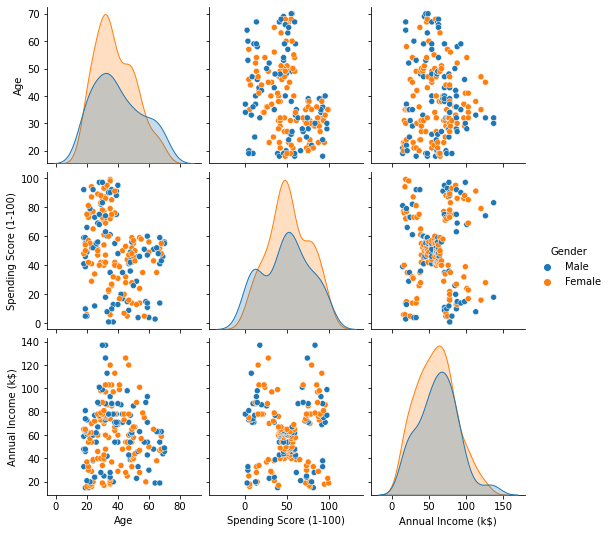

In [37]:
## between male and female
sns.pairplot(mall[['Age','Spending Score (1-100)','Annual Income (k$)','Gender']],hue='Gender')

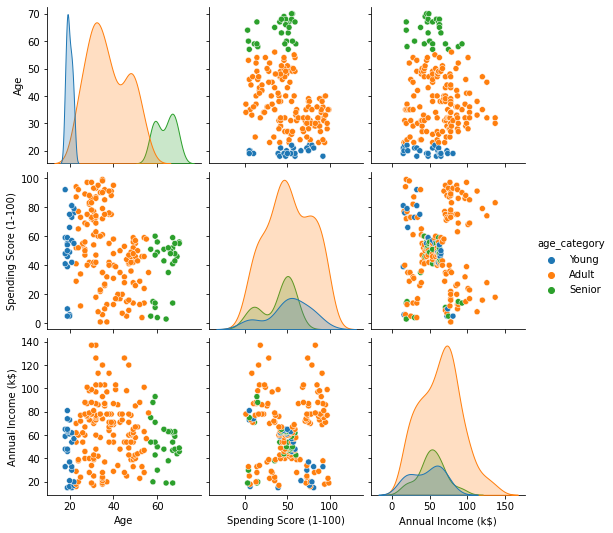

In [39]:
### a parplot with Age score
sns.pairplot(mall[['Age','Spending Score (1-100)','Annual Income (k$)','age_category']],hue='age_category')

Text(0.5, 1.0, 'Annual Income')

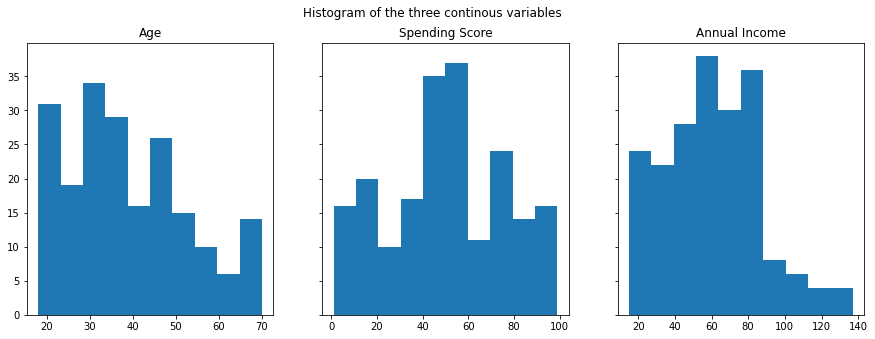

In [52]:
## a histogram of the three continous variables

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Histogram of the three continous variables')

axes[0].hist(x=mall.Age)
axes[0].set_title('Age')
axes[1].hist(x=mall['Spending Score (1-100)'])
axes[1].set_title('Spending Score')

axes[2].hist(x=mall['Annual Income (k$)'])
axes[2].set_title('Annual Income')



In [53]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),age_category,Age-Band
0,1,Male,19,15,39,Young,"(17.999, 24.0]"
1,2,Male,21,15,81,Young,"(17.999, 24.0]"
2,3,Female,20,16,6,Young,"(17.999, 24.0]"
3,4,Female,23,16,77,Adult,"(17.999, 24.0]"
4,5,Female,31,17,40,Adult,"(24.0, 31.0]"


In [83]:
### Corelation between the three continous variables 
cor1=mall[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()

<AxesSubplot:>

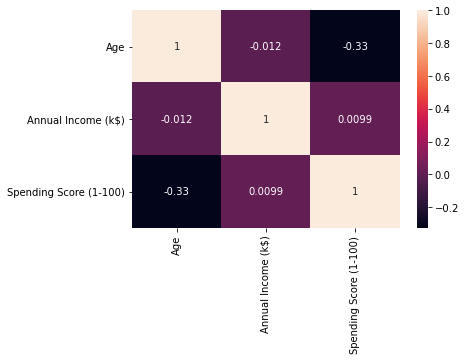

In [85]:
sns.heatmap(cor1,annot=True)

In [55]:
###scaling continous variables

segmentation_paremers= mall[['Age','Annual Income (k$)','Spending Score (1-100)']]
seg_scaled= (segmentation_paremers- segmentation_paremers.min())/(segmentation_paremers.max()- segmentation_paremers.min())


In [56]:
seg_scaled

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score

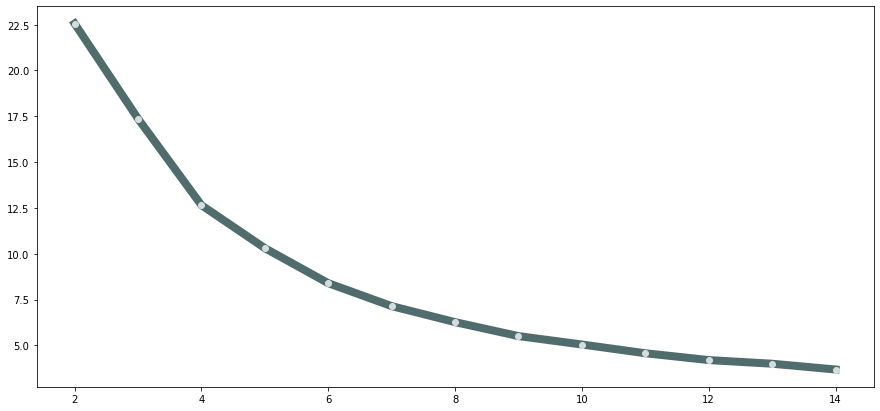

In [62]:
### a comparison between inertia and th number of clusters, the break of the arm or the elbow seems to be at 4 and 6
fig, ax = plt.subplots(figsize=(15,7))

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(seg_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(clusters_range,inertias, '-' , color='#244747',alpha = 0.8,linewidth=8)
plt.plot(clusters_range,inertias, 'o',linewidth=20,color='#d4dddd')    



In [65]:
##adopted from: Joshua swords 
###https://www.kaggle.com/joshuaswords/data-visualization-clustering-mall-data
#Making a senstivity analysis on the silhouette score
clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(seg_scaled)
        silhouette_avg = silhouette_score(seg_scaled,cluster_labels)
        #print("For N_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

In [66]:
results

[[2, 0, 0.3652498066402899],
 [2, 1, 0.3652498066402899],
 [2, 2, 0.3652498066402899],
 [2, 3, 0.3652498066402899],
 [2, 4, 0.3652498066402899],
 [2, 5, 0.3652498066402899],
 [2, 6, 0.3652498066402899],
 [2, 7, 0.3652498066402899],
 [2, 8, 0.3652498066402899],
 [2, 9, 0.3652498066402899],
 [2, 10, 0.3652498066402899],
 [2, 11, 0.3652498066402899],
 [2, 12, 0.3652498066402899],
 [2, 13, 0.3652498066402899],
 [2, 14, 0.3652498066402899],
 [2, 15, 0.3652498066402899],
 [2, 16, 0.3652498066402899],
 [2, 17, 0.3652498066402899],
 [2, 18, 0.3652498066402899],
 [2, 19, 0.3652498066402899],
 [3, 0, 0.36504262943838],
 [3, 1, 0.36504262943838],
 [3, 2, 0.36504262943838],
 [3, 3, 0.36504262943838],
 [3, 4, 0.36146237345652027],
 [3, 5, 0.36504262943838],
 [3, 6, 0.36504262943838],
 [3, 7, 0.36146237345652027],
 [3, 8, 0.36504262943838],
 [3, 9, 0.36504262943838],
 [3, 10, 0.36504262943838],
 [3, 11, 0.36504262943838],
 [3, 12, 0.36146237345652027],
 [3, 13, 0.36146237345652027],
 [3, 14, 0.36504

In [67]:
# Turn results in to a pivot table

result = pd.DataFrame(results, columns=["Number of clusters","Random seed","Silhouette_score"])
pivot_km = pd.pivot_table(result, index="Number of clusters", columns="Random seed",values="Silhouette_score")

In [68]:
pivot_km

Random seed,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Number of clusters,,,,,,,,,,,,,,,,,,,,
2,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250
3,0.365043,0.365043,0.365043,0.365043,0.361462,0.365043,0.365043,0.361462,0.365043,0.365043,0.365043,0.365043,0.361462,0.361462,0.365043,0.365043,0.361462,0.365043,0.365043,0.365043
4,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319
5,0.406117,0.406117,0.406117,0.406117,0.405881,0.406117,0.406117,0.406117,0.406117,0.407299,0.406117,0.406117,0.406117,0.406117,0.406117,0.406117,0.406117,0.406117,0.406117,0.406117
6,0.423618,0.423093,0.423486,0.423486,0.423093,0.423486,0.423486,0.423486,0.423486,0.424303,0.422499,0.423486,0.421554,0.424303,0.423486,0.423486,0.423486,0.421280,0.423486,0.423486
7,0.424932,0.424932,0.424932,0.424932,0.423889,0.424989,0.418809,0.420029,0.424932,0.424932,0.424932,0.424932,0.424932,0.421801,0.422515,0.424932,0.424932,0.423215,0.424932,0.424932
8,0.416490,0.417547,0.417547,0.416903,0.417547,0.421624,0.416490,0.417547,0.416490,0.415935,0.418943,0.414299,0.415935,0.415935,0.420188,0.417300,0.416490,0.417547,0.417547,0.410072
9,0.427284,0.428046,0.426466,0.428718,0.413753,0.427215,0.428046,0.426466,0.428840,0.427925,0.428222,0.412856,0.426893,0.429252,0.427925,0.426408,0.428718,0.428214,0.428046,0.428718
10,0.425340,0.405246,0.398550,0.398115,0.407021,0.400811,0.390817,0.407021,0.430458,0.396491,0.398369,0.406020,0.427337,0.424568,0.388662,0.399021,0.399877,0.427238,0.405803,0.423631


In [71]:
### getting the mean of score per number of clusters, it seems that six and 9 has the highest avrage silhouette score,
#nine categories seems to much and thats why we will go with six.
pivot_km['mean']= pivot_km.mean(axis=1)
pivot_km

Random seed,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,mean
Number of clusters,,,,,,,,,,,,,,,,,,,,,
2,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,...,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250
3,0.365043,0.365043,0.365043,0.365043,0.361462,0.365043,0.365043,0.361462,0.365043,0.365043,...,0.365043,0.361462,0.361462,0.365043,0.365043,0.361462,0.365043,0.365043,0.365043,0.364148
4,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,...,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319,0.392319
5,0.406117,0.406117,0.406117,0.406117,0.405881,0.406117,0.406117,0.406117,0.406117,0.407299,...,0.406117,0.406117,0.406117,0.406117,0.406117,0.406117,0.406117,0.406117,0.406117,0.406165
6,0.423618,0.423093,0.423486,0.423486,0.423093,0.423486,0.423486,0.423486,0.423486,0.424303,...,0.423486,0.421554,0.424303,0.423486,0.423486,0.423486,0.421280,0.423486,0.423486,0.423279
7,0.424932,0.424932,0.424932,0.424932,0.423889,0.424989,0.418809,0.420029,0.424932,0.424932,...,0.424932,0.424932,0.421801,0.422515,0.424932,0.424932,0.423215,0.424932,0.424932,0.423968
8,0.416490,0.417547,0.417547,0.416903,0.417547,0.421624,0.416490,0.417547,0.416490,0.415935,...,0.414299,0.415935,0.415935,0.420188,0.417300,0.416490,0.417547,0.417547,0.410072,0.416919
9,0.427284,0.428046,0.426466,0.428718,0.413753,0.427215,0.428046,0.426466,0.428840,0.427925,...,0.412856,0.426893,0.429252,0.427925,0.426408,0.428718,0.428214,0.428046,0.428718,0.426400
10,0.425340,0.405246,0.398550,0.398115,0.407021,0.400811,0.390817,0.407021,0.430458,0.396491,...,0.406020,0.427337,0.424568,0.388662,0.399021,0.399877,0.427238,0.405803,0.423631,0.408020


In [73]:
### assigning the clusters to mall data
kmeans_sel = KMeans(n_clusters=6, random_state=1).fit(seg_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = mall.assign(Cluster=labels)

In [74]:
clustered_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),age_category,Age-Band,Cluster
0,1,Male,19,15,39,Young,"(17.999, 24.0]",5
1,2,Male,21,15,81,Young,"(17.999, 24.0]",1
2,3,Female,20,16,6,Young,"(17.999, 24.0]",4
3,4,Female,23,16,77,Adult,"(17.999, 24.0]",1
4,5,Female,31,17,40,Adult,"(24.0, 31.0]",5
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,Adult,"(31.0, 36.0]",3
196,197,Female,45,126,28,Adult,"(36.0, 45.0]",2
197,198,Male,32,126,74,Adult,"(31.0, 36.0]",3
198,199,Male,32,137,18,Adult,"(31.0, 36.0]",2


In [80]:
### grouping the clusters by age , income and spend
clustered_data.groupby('Cluster').agg(mean_age= ('Age','mean'),
                               mean_income= ('Annual Income (k$)','mean'),
                               mean_spending=('Spending Score (1-100)','mean'),
                                     count= ('Cluster','size')).reset_index()

,Cluster,mean_age,mean_income,mean_spending,count
0,0,56.333333,54.266667,49.066667,45
1,1,25.272727,25.727273,79.363636,22
2,2,41.939394,88.939394,16.969697,33
3,3,32.692308,86.538462,82.128205,39
4,4,46.250000,26.750000,18.350000,20
5,5,26.707317,55.097561,47.707317,41
